In [351]:
import pandas as pd
import scipy   #biblioteca necessária para obter as funções de treinamento 
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import numpy as np 
from sklearn.metrics import mean_absolute_error #utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error #utilizada para o calculo do MSE
from sklearn.metrics import r2_score #utilizada para o calculo do R2
import seaborn as sns #Deixa os gráficos mais estilizados
from sklearn.linear_model import LinearRegression #Regressão linear
from sklearn.model_selection import train_test_split #Função para separar dados de treino e validação
from sklearn import metrics # Biblioteca de métricas de performance

In [352]:
# Função para plotar o gráfico comparativo entre os valores previstos e esperados da base de teste após treinamento
def grafico(previsto,real,nome):
    previsto = np.array(previsto)
    real = np.array(real)
    
    MAE = mean_absolute_error(real,previsto)
    
    y1 = previsto[:50]
    x1 = range(len(y1))
    y2 = real[:50]
    x2 = range(len(y2))
    

    plt.title('Gráfico de Predições:'+nome)
    plt.xlabel('MAE: '+str(MAE))
    plt.ylabel('Valores')

    plt.plot(x1,y1,color='#D90286',linestyle='-',label='Predita')
    plt.plot(x2,y2,color='#0864AD',linestyle='-.', label = 'Esperada')
    plt.legend()
    plt.show()

#Normalização dos dados para reduzir erros
def normalize(data):
    data = data/100
    return data
#Retornar valores previstos para a escala original
def normalize_back(data):
    data = data*100
    return data
#Calcula a média das colunas das notas de cada disciplina, para serem usadas como um parâmetro adicional de previsão
def media(a,b,c,d,e):
    mean = []
    for i in range(len(a)):
        result = (a[i]+b[i]+c[i]+d[i]+e[i])/5
        mean.append(result)
    return mean

def media_teste(a,b,c,d):
    mean = []
    for i in range(len(a)):
        result = (a[i]+b[i]+c[i]+d[i])/4
        mean.append(result)
    return mean

In [353]:
df = pd.read_csv('Data/train.csv') #Base de dados de treinamento
df_teste = pd.read_csv('Data/test.csv') #Base de testes para serem previstos

In [354]:
df.describe()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
count,13730.000000,13730.0,1.373000e+04,13730.000000,13730.000000,13202.000000,13730.000000,13730.000000,1.312100e+04,13121.000000,...,6354.000000,6354.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,2938.000000
mean,2288.173926,2016.0,3.088548e+06,30.736708,21.593809,0.116043,2.185652,1.048871,3.057946e+06,30.429159,...,4.530217,3.962858,4.645594,4.678441,3.341515,4.458995,3.724618,3.506409,4.442098,3.671545
std,1321.230607,0.0,9.890495e+05,9.862405,7.043654,0.365986,1.007285,0.258895,9.703020e+05,9.670030,...,1.027613,1.625356,0.920998,0.865039,1.711930,1.200172,1.689362,1.718858,1.181549,1.746444
min,0.000000,2016.0,1.100023e+06,11.000000,13.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1144.000000,2016.0,2.307650e+06,23.000000,17.000000,0.000000,1.000000,1.000000,2.306900e+06,23.000000,...,5.000000,3.000000,5.000000,5.000000,2.000000,5.000000,3.000000,2.000000,4.000000,3.000000
50%,2288.000000,2016.0,3.118601e+06,31.000000,19.000000,0.000000,3.000000,1.000000,3.106200e+06,31.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000
75%,3432.000000,2016.0,3.550308e+06,35.000000,23.000000,0.000000,3.000000,1.000000,3.549805e+06,35.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,4586.000000,2016.0,5.300108e+06,53.000000,67.000000,3.000000,5.000000,4.000000,5.300108e+06,53.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


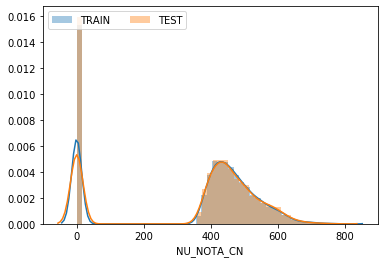

In [355]:
#Preenche os valores nulos da coluna de notas e plota a distribuição das notas para a base de treino e de teste
x0 = df['NU_NOTA_CN'].fillna(0)
x1 = df_teste['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left')
#Notamos aqui que as duas bases tem uma distribuição quase normal das notas quando excluimos os dados nulos
#É recomendado analisar as distribuições de todos os parâmetros que se deseja utilziar no modelo de previsão

In [356]:
#Analisamos a correlação linear dos dados para se estipular os dados a serem utilizados como parâmetros
corr = df.corr()["NU_NOTA_MT"]
corr = corr [corr > 0.29]
corr

TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_MT                1.000000
NU_NOTA_COMP1             0.299402
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP5             0.343337
NU_NOTA_REDACAO           0.379376
Name: NU_NOTA_MT, dtype: float64

In [357]:
# Os parâmetros escolhidos foram os abaixo, nota-se que o parâmetro TP_DEPENDENCIA_ADM_ESC não foi selecionado apesar do alto índice de correlação pois pela análise do dicionário de dados observa-se que ela não deveria ter uma correlação direta com os valores da nota, portanto foi excluida para evitar possíveis erros.
novo = {
    'matematica': df['NU_NOTA_MT'],
    'ciencias_nat': df['NU_NOTA_CN'],
    'linguagens': df['NU_NOTA_LC'],
    'ciencias_hum': df['NU_NOTA_CH'],
    'redacao': df['NU_NOTA_REDACAO'],
    'nota_comp3': df['NU_NOTA_COMP3'],
    'nota_comp1': df['NU_NOTA_COMP1'],
    'nota_comp2': df['NU_NOTA_COMP2'],
    'nota_comp4': df['NU_NOTA_COMP4'],
    'nota_comp5': df['NU_NOTA_COMP5']
}

novo_teste = {
    'inscricao' :df_teste['NU_INSCRICAO'],
    'ciencias_nat': df_teste['NU_NOTA_CN'],
    'linguagens': df_teste['NU_NOTA_LC'],
    'ciencias_hum': df_teste['NU_NOTA_CH'],
    'redacao': df_teste['NU_NOTA_REDACAO'],
    'nota_comp3': df_teste['NU_NOTA_COMP3'],
    'nota_comp1': df_teste['NU_NOTA_COMP1'],
    'nota_comp2': df_teste['NU_NOTA_COMP2'],
    'nota_comp4': df_teste['NU_NOTA_COMP4'],
    'nota_comp5': df_teste['NU_NOTA_COMP5']
}

In [358]:
#Atualiza os dataframes com as novas colunas e se calcula a coluna de média com as notas das diferentes competências e se retira as linhas com dados nulos
df = pd.DataFrame(novo)
df['media'] = media(np.array(df.matematica),np.array(df.ciencias_nat),np.array(df.linguagens),np.array(df.ciencias_hum),np.array(df.redacao))
df.dropna(inplace = True)
df_teste = pd.DataFrame(novo_teste)
df_teste.dropna(inplace = True)
df.head()

,matematica,ciencias_nat,linguagens,ciencias_hum,redacao,nota_comp3,nota_comp1,nota_comp2,nota_comp4,nota_comp5,media
0,399.4,436.3,581.2,495.4,520.0,120.0,120.0,120.0,80.0,80.0,486.46
1,459.8,474.5,599.0,544.1,580.0,120.0,140.0,120.0,120.0,80.0,531.48
5,364.5,439.7,410.9,583.2,620.0,120.0,120.0,120.0,160.0,100.0,483.66
6,529.2,420.1,484.5,604.2,560.0,120.0,100.0,120.0,120.0,100.0,519.60
7,566.7,619.6,611.2,625.8,620.0,120.0,140.0,120.0,120.0,120.0,608.66


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10097 entries, 0 to 13729
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   matematica    10097 non-null  float64
 1   ciencias_nat  10097 non-null  float64
 2   linguagens    10097 non-null  float64
 3   ciencias_hum  10097 non-null  float64
 4   redacao       10097 non-null  float64
 5   nota_comp3    10097 non-null  float64
 6   nota_comp1    10097 non-null  float64
 7   nota_comp2    10097 non-null  float64
 8   nota_comp4    10097 non-null  float64
 9   nota_comp5    10097 non-null  float64
 10  media         10097 non-null  float64
dtypes: float64(11)
memory usage: 946.6 KB


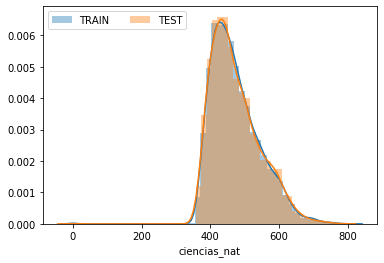

In [360]:
#Plota novamente a distribuição de notas das bases de treino e teste e se comprova que elas são semelhantes. Deve-se realizer essa comprevação para todas as variáveis de predição para um melhor resultado
x0 = df['ciencias_nat']
x1 = df_teste['ciencias_nat']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left')

In [361]:
# Normaliza os dados de treino e teste
df = df.apply(normalize)
df_teste = df_teste.apply(normalize)
df.head()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [362]:
#A escolha do modelo de regressão se deu pela regressão linear por ser simples e ter demonstrado um bom resultado, outros modelos podem ser facilmente testados neste programa
lin = LinearRegression()

In [363]:
#Aloca as variáveis dependentes (y) e independentes (ou preditoras - x)
x = df.iloc[ : , 1:]
y = df['matematica']

In [364]:
# Divide o dataset de treino em uma base de treino (90%) e uma base de validação (10%). O atributo random_state garante replicabilidade do modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [365]:
regressao = lin.fit(x_train,y_train) #Treina o modelo

In [366]:
previsao = lin.predict(x_test) #Realiza a previsão

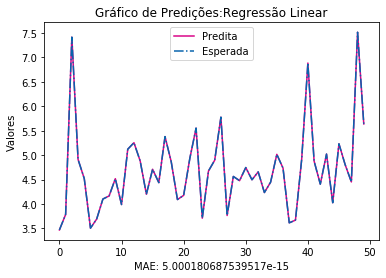

In [367]:
# Plotamos o gráfico de previsão e esperado e notamos que o modelo se adequou muito bem 
grafico(previsao,y_test,'Regressão Linear')

In [368]:
#Mostra os níveis de erros muito baixos
print('MAE:', metrics.mean_absolute_error(y_test, previsao)  )
print('MSE:', metrics.mean_squared_error(y_test, previsao) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, previsao)))

MAE: 5.000180687539517e-15
MSE: 3.8281623314452924e-29
RMSE: 6.187214503672305e-15


In [369]:
#Definimos as colunas para a previsão real
x_real = df_teste.iloc[:,1:]
x_real

,ciencias_nat,linguagens,ciencias_hum,redacao,nota_comp3,nota_comp1,nota_comp2,nota_comp4,nota_comp5
0,464.8,431.8,443.5,420.0,80.0,120.0,80.0,100.0,40.0
1,391.1,548.0,491.1,580.0,120.0,120.0,120.0,120.0,100.0
2,595.9,613.6,622.7,320.0,40.0,80.0,40.0,80.0,80.0
4,592.9,571.4,492.6,320.0,60.0,100.0,80.0,80.0,0.0
5,414.5,542.5,568.5,560.0,120.0,120.0,120.0,120.0,80.0
...,...,...,...,...,...,...,...,...,...
4570,465.9,603.9,602.3,540.0,100.0,120.0,120.0,120.0,80.0
4571,398.3,511.6,558.2,500.0,120.0,120.0,120.0,100.0,40.0
4572,427.6,471.1,579.7,520.0,100.0,100.0,100.0,120.0,100.0
4573,639.2,604.9,643.8,640.0,120.0,160.0,140.0,140.0,80.0


In [370]:
# Calculamos o valor da média das competências
x_real['media'] = media_teste(np.array(x_real.ciencias_nat),np.array(x_real.linguagens),np.array(x_real.ciencias_hum),np.array(x_real.redacao))

In [371]:
# Realiza a previsão
previsão_final = lin.predict(x_real)

In [372]:
# Salva a previsão em uma nova coluna
df_teste['matematica'] = previsão_final

In [373]:
# Formata o dataframe no modelo de entrega do desafio
df_teste = df_teste[['inscricao','matematica']]
df_teste

,inscricao,matematica
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,440.025
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,502.550
2,b38a03232f43b11c9d0788abaf060f7366053b6d,538.050
4,715494628a50142ce8cb17191cfe6d0f3cae0934,494.225
5,e656d6bad65c93fb2880f1eba5037008c8e75774,521.375
...,...,...
4570,13aaf6335f43cfc1b8baeac559324f20b2653724,553.025
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,492.025
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,499.600
4573,655fa6306720ff16e825903b5422a46608a77545,631.975


In [374]:
# Exporta e confere os dados
df_teste.to_csv('answer.csv',index=False)

In [375]:
final = pd.read_csv('answer.csv')
final.head()

,inscricao,matematica
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,440.025
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,502.550
2,b38a03232f43b11c9d0788abaf060f7366053b6d,538.050
3,715494628a50142ce8cb17191cfe6d0f3cae0934,494.225
4,e656d6bad65c93fb2880f1eba5037008c8e75774,521.375
